In [1]:
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

import galsim
import matplotlib.pyplot as plt
import numpy as np
from astropy.table import Table
import batoid

In [ ]:
np.load('record/10.zernike')

In [ ]:
img=np.load('record/3.image')

In [ ]:
plt.imshow(2*img + np.random.normal(0,20, size=img.shape))
plt.colorbar()

In [ ]:
img0=np.load('record/0.image')
img1=np.load('record/1.image')

In [ ]:
np.sum(img > 0)

In [ ]:
img.sum()

In [ ]:
t = Table.read('/labs/khatrilab/scottmk/david/wfsim/record/record.csv')

In [ ]:
t

In [3]:
tel = batoid.Optic.fromYaml("LSST_r.yaml")

In [4]:
x = -0.021479371935129166
y = -0.020328132435679436

In [5]:
wf1 = batoid.analysis.zernikeGQ(tel, x, y, 500e-9, reference='chief', eps=0.61, rings=6)
wf2 = batoid.analysis.zernikeGQ(tel, x, y, 500e-9, reference='chief', eps=0.61, rings=10)
wf3 = batoid.analysis.zernikeGQ(tel, x, y, 500e-9, reference='chief', eps=0.61, rings=20)

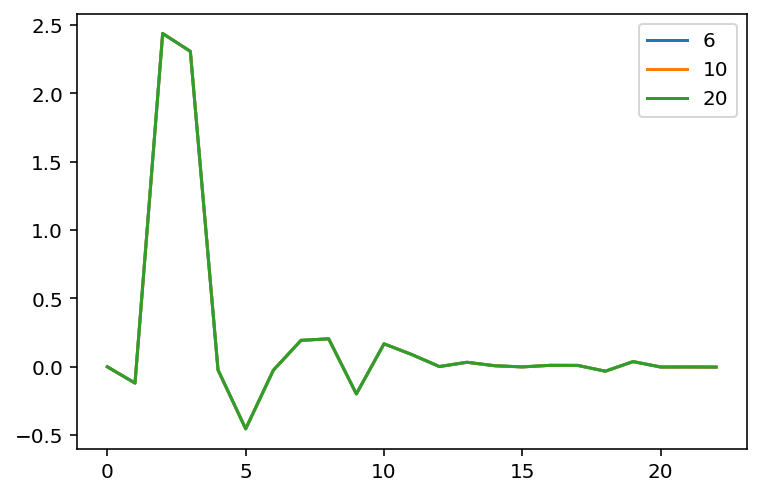

In [6]:
plt.plot(wf1, label='6')
plt.plot(wf2, label='10')
plt.plot(wf3, label='20')
plt.legend()

In [7]:
from batoid.utils import fieldToDirCos

rings=6
spokes=None
eps=0.61
wavelength=500e-9
dirCos = fieldToDirCos(x, y, projection='postel')
inner = eps*tel.pupilSize/2
rays = batoid.RayVector.asSpokes(
    optic=tel, wavelength=wavelength,
    inner=inner,
    dirCos=dirCos,
    rings=rings,
    spokes=spokes,
    spacing='GQ',
)

In [8]:
len(rays)

78

In [9]:
t1 = Table.read('/labs/khatrilab/scottmk/david/wfsim/record/record.csv')
t2 = Table.read('/labs/khatrilab/scottmk/david/wfsim/record2/record.csv')

In [10]:
t1

idx,observationId,sourceId,runId,fieldx,fieldy,posx,posy,parallactic,airmass,zenith,seed,chip,intensity,temperature
int64,int64,int64,int64,int64,int64,int64,int64,int64,int64,int64,int64,int64,int64,int64


In [11]:
t2

idx,observationId,sourceId,runId,fieldx,fieldy,posx,posy,parallactic,airmass,zenith,seed,chip,intensity
int64,int64,int64,int64,float64,float64,float64,float64,float64,float64,float64,int64,str7,int64
0,789849,6869180099756989696,0,-0.019176075235009193,-0.020485633984208107,-0.19663260877132416,-0.212132066488266,-2.738729953765869,1.035051941871643,0.2609896957874298,7,R00_SW0,3284541


In [12]:
cat1 = Table.read('cat1.csv')
cat2 = Table.read('cat2.csv')
cat3 = Table.read('cat3.csv')
cat4 = Table.read('cat4.csv')
cat5 = Table.read('cat5.csv')
cat6 = Table.read('cat6.csv')
cat7 = Table.read('cat7.csv')
cat8 = Table.read('cat8.csv')

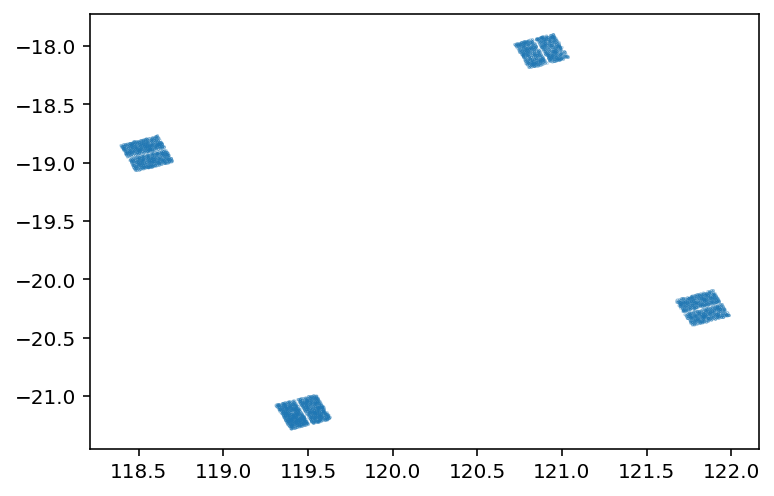

In [13]:
plt.scatter(cat1['ra'], cat1['dec'], s=0.01)

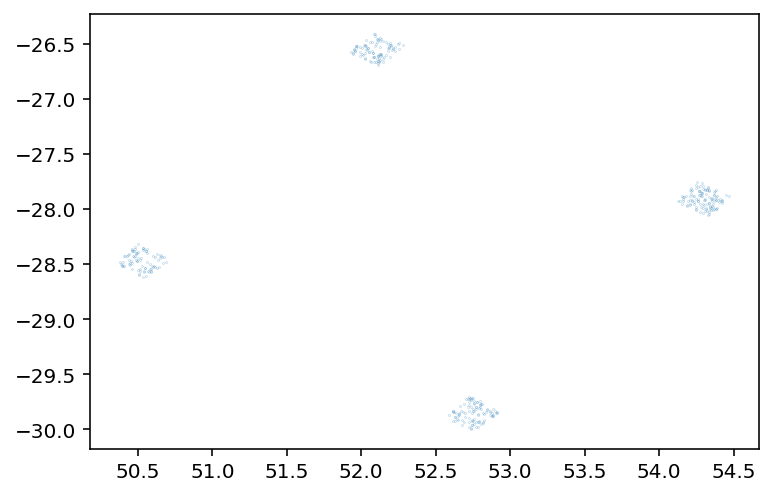

In [14]:
plt.scatter(cat2['ra'], cat2['dec'], s=0.01)

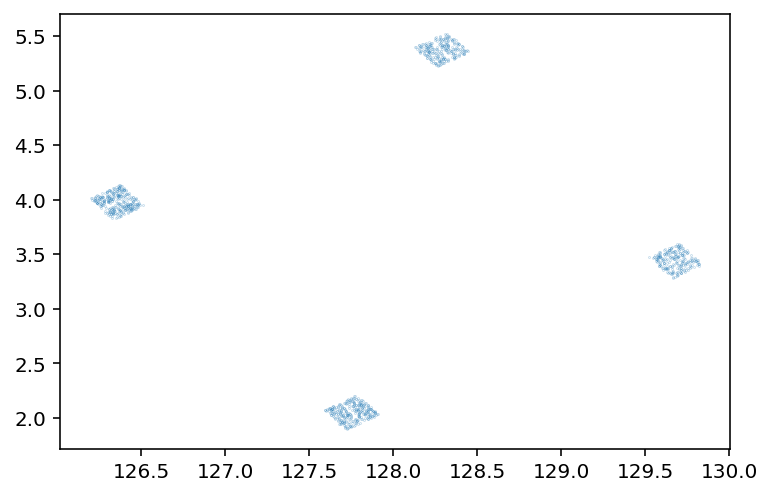

In [15]:
plt.scatter(cat3['ra'], cat3['dec'], s=0.01)

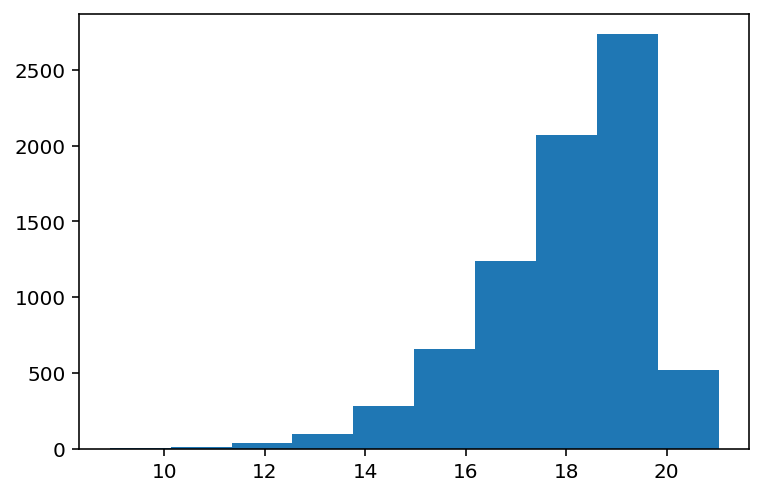

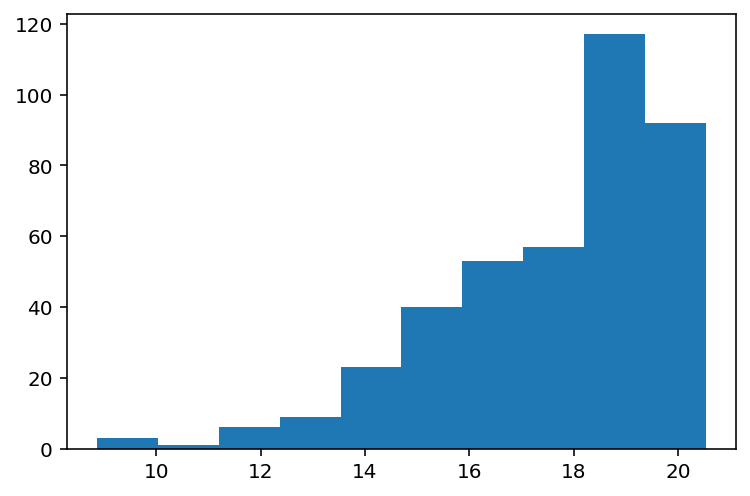

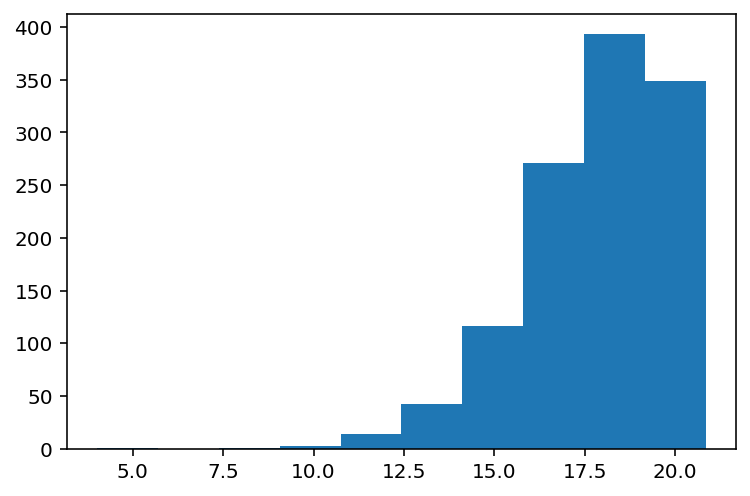

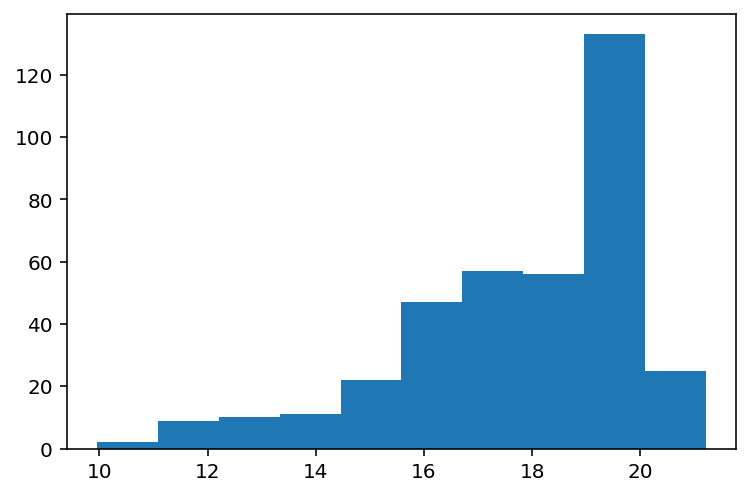

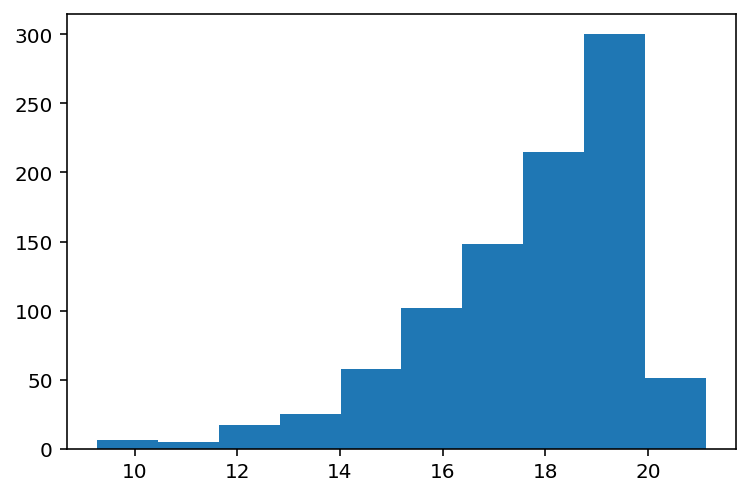

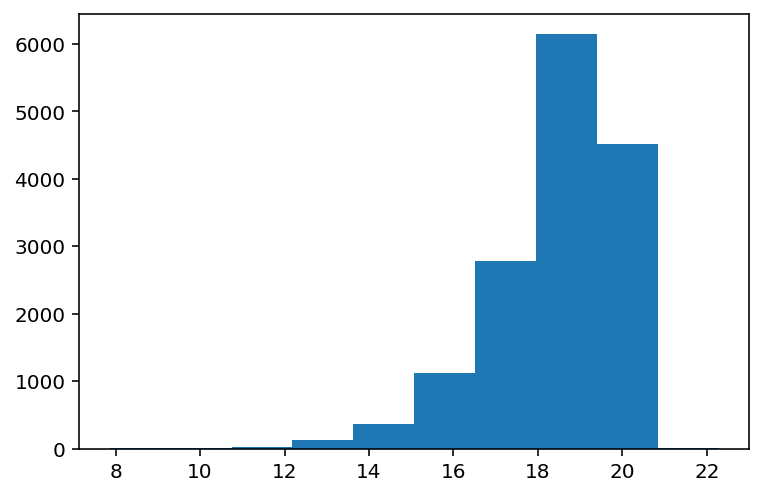

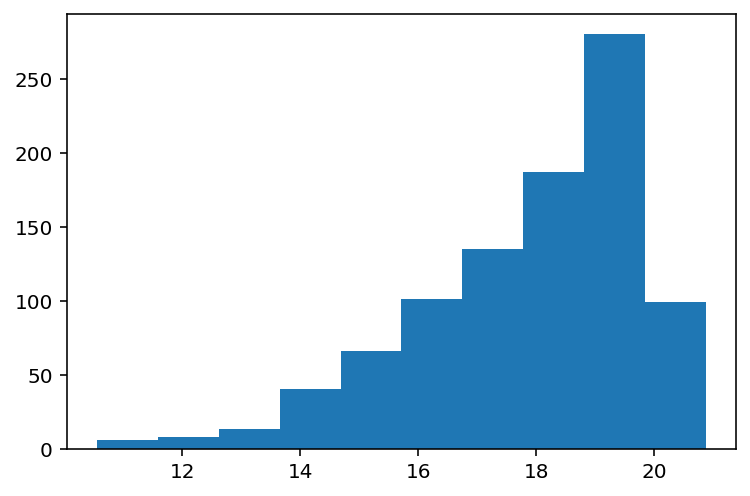

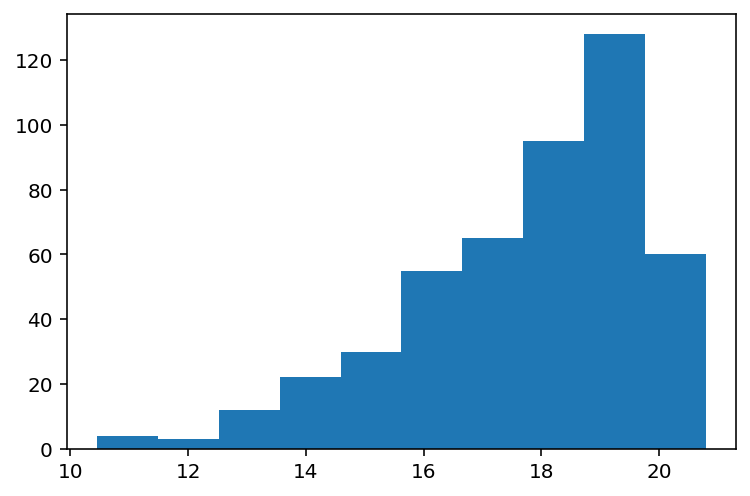

In [16]:
cats = [cat1, cat2, cat3, cat4, cat5, cat6, cat7, cat8]
for cat in cats:
    plt.figure()
    plt.hist(cat['sdss_r_mag'])

In [17]:
from starSim import *

for cat in cats:
    sub = cat[[cat['sdss_r_mag'] < 18]]
    sum = 0
    for mag in sub['sdss_r_mag']:
        sum += Flux.nphotons(max(14,mag), 4000)
    print(len(sub), sum / len(sub) * 3e-6)

Created TAP+ (v1.2.1) - Connection:
	Host: gea.esac.esa.int
	Use HTTPS: True
	Port: 443
	SSL Port: 443
Created TAP+ (v1.2.1) - Connection:
	Host: geadata.esac.esa.int
	Use HTTPS: True
	Port: 443
	SSL Port: 443
3268 6.886461529681763
174 11.696101586206897
535 9.154487876635514
167 10.433692958083833
429 10.136439412587412
4562 5.97499051775537
403 9.156159104218363
218 10.26915456880734


/labs/khatrilab/scottmk/Software/miniconda37/envs/core/lib/python3.6/site-packages/astropy/table/table.py:1145: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  newcol = col[slice_]
/home/scottmk/.local/lib/python3.6/site-packages/numpy/ma/core.py:3174: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  dout = self.data[indx]
/home/scottmk/.local/lib/python3.6/site-packages/numpy/ma/core.py:3206: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this w

(-52.75, -51.75)

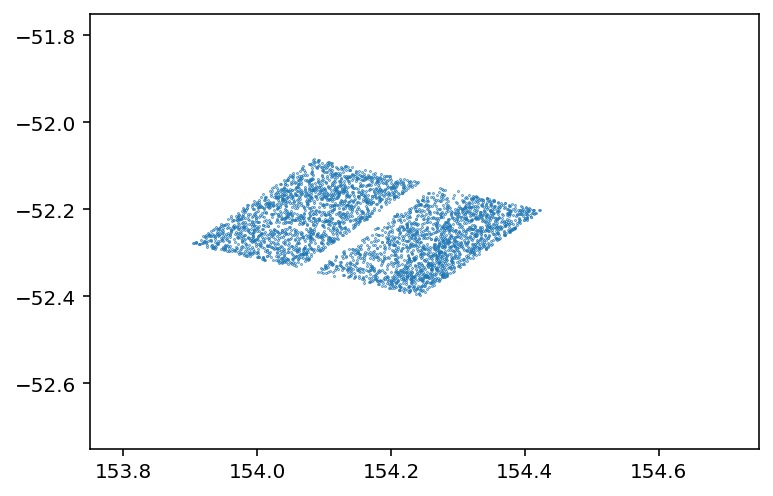

In [18]:
plt.scatter(cat6['ra'], cat6['dec'], s=0.1)
plt.xlim([153.75,154.75])
plt.ylim([-52.75,-51.75])

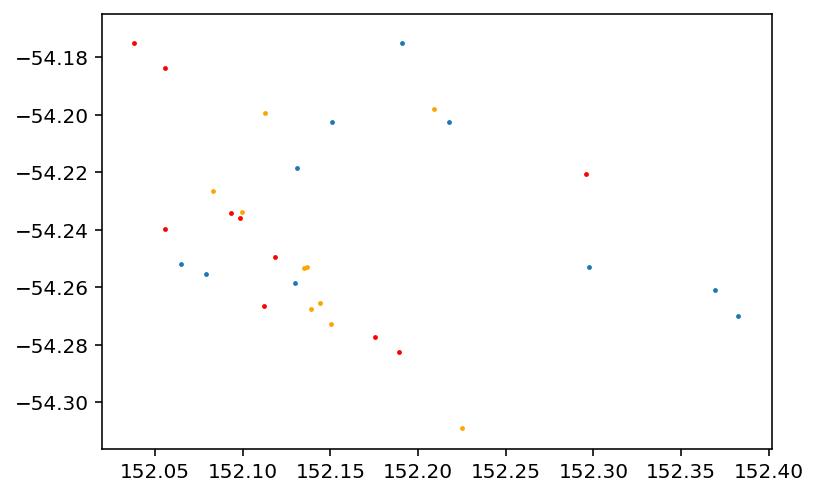

In [19]:
sub = cat6[[cat6['sdss_r_mag'] < 16]]
plt.scatter(sub[:10]['ra'], sub[:10]['dec'], s=2)
plt.scatter(sub[10:20]['ra'], sub[10:20]['dec'], s=2, color='orange')
plt.scatter(sub[20:30]['ra'], sub[20:30]['dec'], s=2, color='red')
# plt.xlim([153.75,154.75])
# plt.ylim([-52.75,-51.75])

In [20]:
cat6[[cat6['sdss_r_mag'] < 16]]

source_id,ra,dec,teff_val,phot_g_mean_mag,phot_bp_mean_mag,phot_rp_mean_mag,chip,sdss_r_mag
int64,float64,float64,float64,float64,float64,float64,str7,float64
5356144008521170944,152.36946005703416,-54.261103103912376,5023.65234375,15.168929100036621,15.628509521484375,14.534607887268066,R00_SW0,15.125554084777832
5356144966274724992,152.21738949206792,-54.20248915678046,3268.0,15.091166496276855,16.495052337646484,13.906661033630371,R00_SW0,15.6234130859375
5356148367885595008,152.19054162942916,-54.17502762099297,4923.1650390625,15.07776927947998,15.660582542419434,14.340302467346191,R00_SW0,15.042665481567383
5356148058651179776,152.15087398515118,-54.20248489089131,5143.4501953125,15.374632835388184,15.647582054138184,14.508209228515625,R00_SW0,15.331247329711914
5356141672058338560,152.07923345645818,-54.25552805708507,4261.0,14.949136734008789,15.751420021057129,14.056607246398926,R00_SW0,14.979642868041992
5356141672058336256,152.0649975652543,-54.25192049029634,5287.8701171875,15.110321998596191,15.509278297424316,14.480372428894043,R00_SW0,15.068317413330078
5356143939801416320,152.38241409720305,-54.26985819337362,5072.91259765625,15.471333503723145,15.9365234375,14.833450317382812,R00_SW0,15.427892684936523
5356143866763014272,152.2973389493093,-54.25312776235295,4922.5,15.891563415527344,16.397014617919922,15.137255668640137,R00_SW0,15.85214900970459
5356142148778802176,152.1310113857088,-54.21850050005785,4906.5673828125,15.743910789489746,16.218564987182617,15.063457489013672,R00_SW0,15.700709342956543


# Check Data

In [2]:
!ls observation11

0.image     25.image	40.image    56.image	71.image    87.image
0.zernike   25.zernike	40.zernike  56.zernike	71.zernike  87.zernike
10.image    26.image	41.image    57.image	72.image    88.image
10.zernike  26.zernike	41.zernike  57.zernike	72.zernike  88.zernike
11.image    27.image	42.image    58.image	73.image    89.image
11.zernike  27.zernike	42.zernike  58.zernike	73.zernike  89.zernike
12.image    28.image	43.image    59.image	74.image    8.image
12.zernike  28.zernike	43.zernike  59.zernike	74.zernike  8.zernike
13.image    29.image	44.image    5.image	75.image    90.image
13.zernike  29.zernike	44.zernike  5.zernike	75.zernike  90.zernike
14.image    2.image	45.image    60.image	76.image    91.image
14.zernike  2.zernike	45.zernike  60.zernike	76.zernike  91.zernike
15.image    30.image	46.image    61.image	77.image    92.image
15.zernike  30.zernike	46.zernike  61.zernike	77.zernike  92.zernike
16.image    31.image	47.image    62.image	78.image    93.image
16.zernike  31.zern

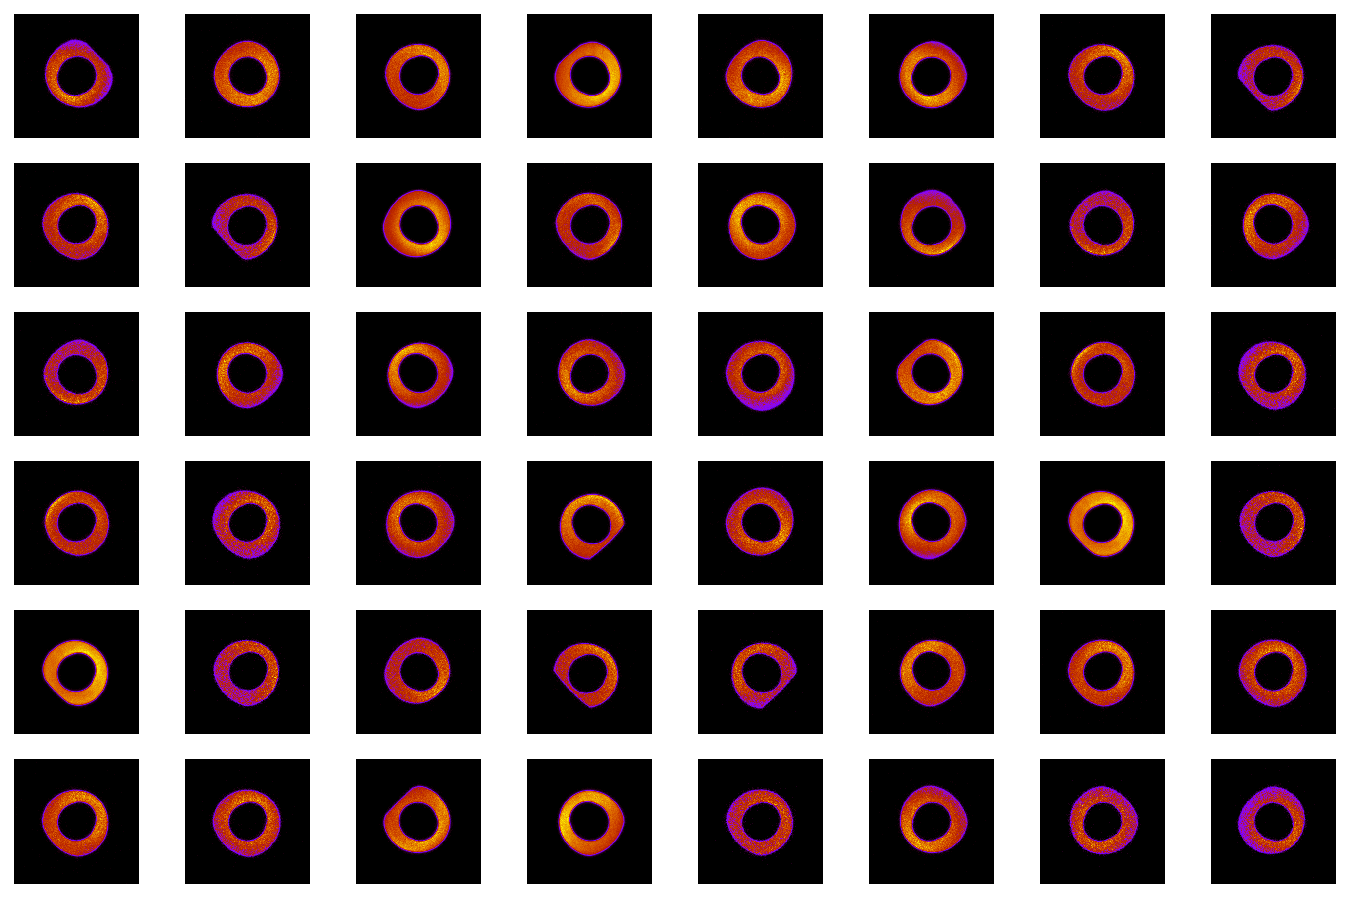

In [11]:
fig, axes = plt.subplots(6,8)
fig.set_size_inches((12,8))
for i in range(6):
    for j in range(8):
        ax = axes[i,j]
        ax.imshow(np.load(f'observation11/{i*6+j}.image'), cmap='gnuplot')
        ax.axis('off')

In [38]:
print(np.load('observation11/50.zernike'))

[ 0.          1.5401975   0.22141135  0.67976925 -0.08712739 -0.29132046
 -0.18337014  0.15789095  0.33112738  0.24891897 -0.25258678 -0.16137975
  0.00828088 -0.10262028 -0.00642705  0.02872712 -0.02027788 -0.07906304
  0.07898797 -0.02774356  0.02319593  0.08220634 -0.02759511]


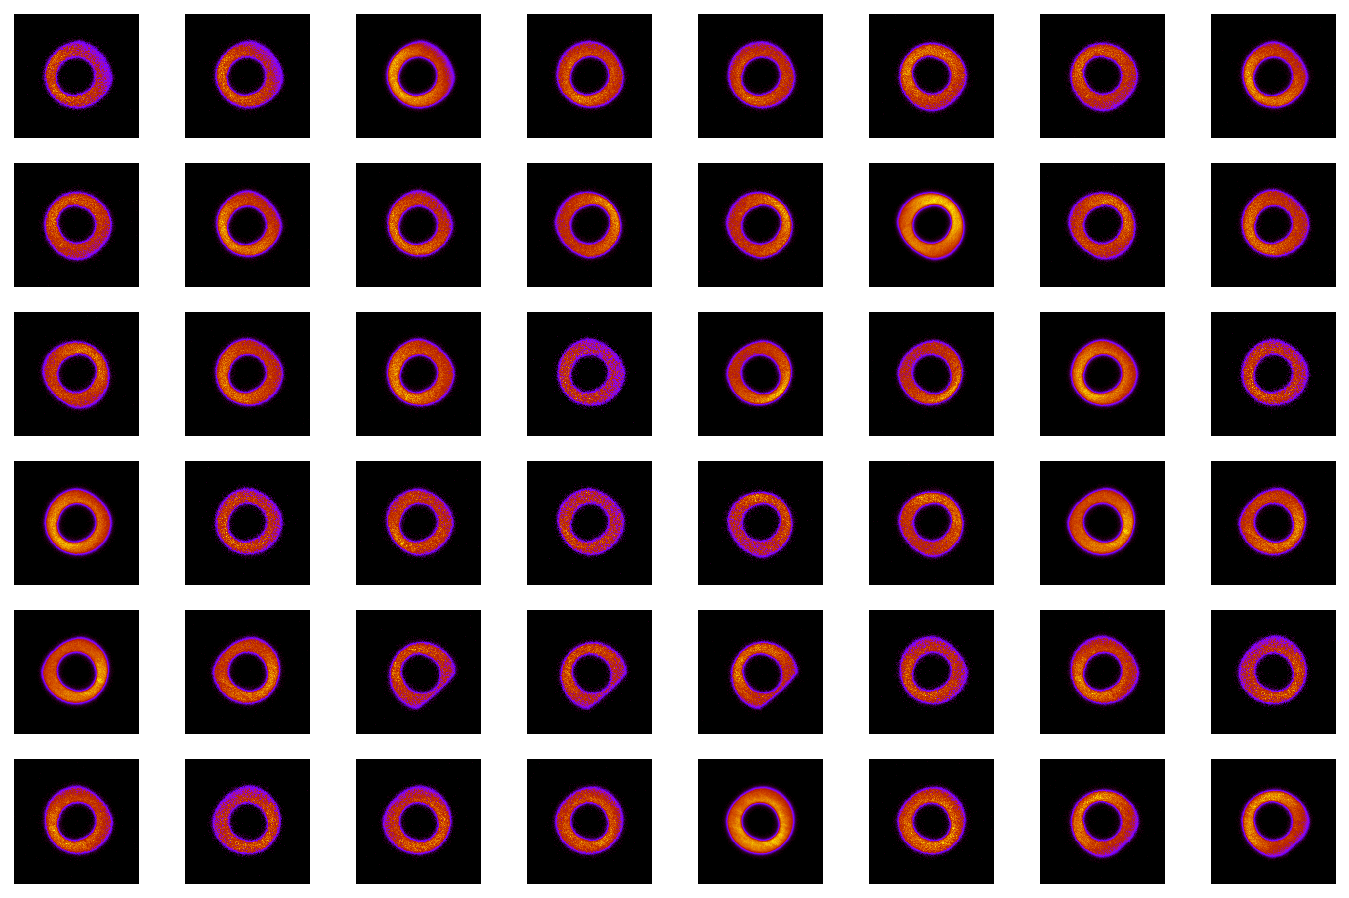

In [12]:
fig, axes = plt.subplots(6,8)
fig.set_size_inches((12,8))
for i in range(6):
    for j in range(8):
        ax = axes[i,j]
        ax.imshow(np.load(f'blend99/{i*6+j}.image'), cmap='gnuplot')
        ax.axis('off')

In [14]:
Table.read('blend99/record.csv')

idx,observationId,sourceId,blendId,neighborId,fieldx,fieldy,posx,posy,parallactic,airmass,zenith,seed,chip,intensity,temperature
int64,int64,int64,int64,int64,float64,float64,float64,float64,float64,float64,float64,int64,str7,int64,float64
0,104143,5190827002122646400,0,0,-0.022070201113820076,0.019209302961826324,-0.2274971753358841,0.19823528826236725,-3.8353583812713623,1.8167930841445923,0.9879286289215088,99,R40_SW1,282937,5461.93798828125
1,104143,5190827006420524160,0,1,-0.022108949720859528,0.01925637014210224,-0.22789864242076874,0.1987219601869583,-3.8353583812713623,1.8167930841445923,0.9879286289215088,99,R40_SW1,462801,8961.6787109375
2,104143,5190827006420525312,0,2,-0.022046593949198723,0.01919362135231495,-0.22725385427474976,0.19807323813438416,-3.8353583812713623,1.8167930841445923,0.9879286289215088,99,R40_SW1,2484871,5424.33349609375
3,104143,5197649510427916160,1,0,0.019810562953352928,-0.019920440390706062,0.20502133667469025,-0.20596720278263092,-3.8353583812713623,1.8167930841445923,0.9879286289215088,99,R04_SW0,836136,4413.33349609375
4,104143,5197649544790490368,1,1,0.019838619977235794,-0.019939150661230087,0.20530949532985687,-0.20616023242473602,-3.8353583812713623,1.8167930841445923,0.9879286289215088,99,R04_SW0,808257,4855.0
5,104143,5782693772051740288,2,0,0.01901300624012947,0.01892203651368618,0.19605568051338196,0.19526143372058868,-3.8353583812713623,1.8167930841445923,0.9879286289215088,99,R44_SW0,674827,3994.0
6,104143,5782693772054405120,2,1,0.019036436453461647,0.018912337720394135,0.19629697501659393,0.19516246020793915,-3.8353583812713623,1.8167930841445923,0.9879286289215088,99,R44_SW0,611177,6793.17529296875
7,104143,5190827448798907392,3,0,-0.021661164239048958,0.020135600119829178,-0.2233353555202484,0.20761780440807343,-3.8353583812713623,1.8167930841445923,0.9879286289215088,99,R40_SW1,1061998,5413.0
8,104143,5190827453097124864,3,1,-0.0216805599629879,0.0201621875166893,-0.22353562712669373,0.20789167284965515,-3.8353583812713623,1.8167930841445923,0.9879286289215088,99,R40_SW1,747412,5583.865234375
